In [1]:
cd matlab
pwd
clear all
imatlab_export_fig('print-svg')  % Static svg figures.
format compact

ans =
    '/Users/eechris/code/src/github.com/cpjobling/eglm03-textbook/03/4/matlab'


In [2]:
G1 = tf(1,conv([1, 0],[1, 1])); H=1;

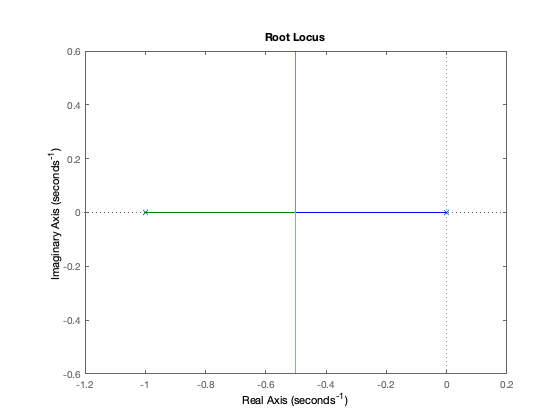

In [3]:
rlocus(G1*H)

In [4]:
D1 = zpk([-1],[-4],1);
Go1 = D1*G1*H;

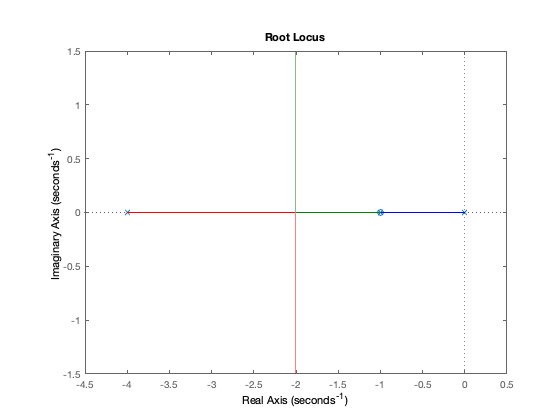

In [5]:
rlocus(Go1)

In [6]:
Kc = rlocfind(Go1,-2+2j)

Kc =
     8


In [7]:
G = tf(1,[1,0,0]);
H = 1;
GH = G*H;
s1 = -2+2j;

In [8]:
[zeros,poles,gain]=zpkdata(GH,'v');

In [9]:
contrib = (180/pi)*(sum(angle(s1 - zeros)) - sum(angle(s1 - poles)))

contrib =
  -270


In [10]:
phi_c = -180 - contrib

phi_c =
    90


In [11]:
half_phi_c = phi_c/2

half_phi_c =
    45


In [12]:
angle_OAB = 135;
angle_BAD = angle_OAB/2 - half_phi_c;
angle_BEO = angle_OAB/2 + half_phi_c;

In [13]:
theta_p = angle_BAD

theta_p =
   22.5000


In [14]:
theta_z = angle_BEO

theta_z =
  112.5000


In [15]:
p0 = -2-2/tan(theta_p*pi/180)

p0 =
   -6.8284


In [16]:
z0 = -2-2/tan(theta_z*pi/180)

z0 =
   -1.1716


In [17]:
Ko = (abs(s1-p0)*prod(abs(s1-poles)))/(abs(s1-z0)*prod(abs(s1-zeros)))

Ko =
   19.3137


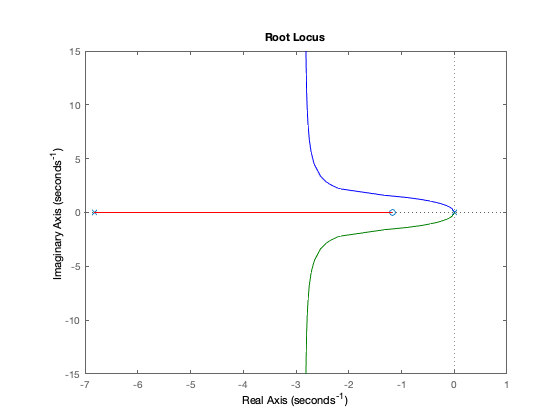

In [18]:
D = zpk(z0,p0,1);
Go=D*GH;
rlocus(Go)

In [19]:
Kc = rlocfind(Go,s1)

Kc =
   19.3137


In [20]:
G1 = tf(8,[1, 4, 8]);
G2 = tf(4*[1, 2],[1, 4, 8]);
G3 = feedback(Kc*D*G,H)


G3 =


      19.314 (s+1.172)


  ------------------------


  (s+2.828) (s^2 + 4s + 8)


Continuous-time zero/pole/gain model.



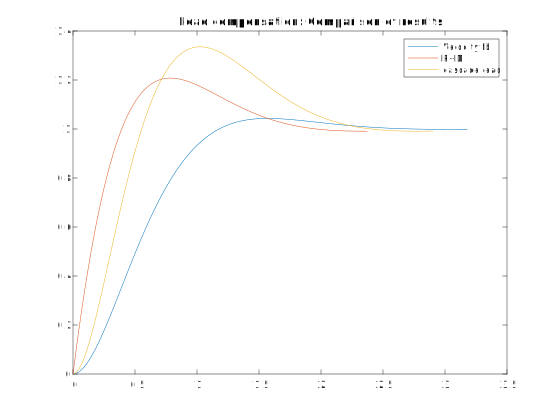

In [21]:
[y1,t1]=step(G1);
[y2,t2]=step(G2);
[y3,t3]=step(G3);
plot(t1,y1,t2,y2,t3,y3),legend('Velocity fb','P+D','cascade lead'),title('Lead compensation: Comparison of results')